## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-13 | veh18.csv |
| 14-16 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


# Part 0

Please provide the following information:
 - Name (Student ID) : Dharmik Patel Id : 0813537
 - Name (Student ID) : Harshil Patel Id : 0801869
 - Name (Student ID) : Deep Chaudhari Id : 0813502

     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('veh18.csv')

In [3]:
data.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,4.0,8,26.6603,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N
2,6.0,12,20.4316,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
3,6.0,12,21.3382,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
4,1.5,3,36.7632,6,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1163 non-null   float64
 1   # Cyl                              1163 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1163 non-null   float64
 3   # Gears                            1163 non-null   int64  
 4   Max Ethanol % - Gasoline           1163 non-null   float64
 5   Intake Valves Per Cyl              1163 non-null   int64  
 6   Exhaust Valves Per Cyl             1163 non-null   int64  
 7   Fuel Metering Sys Desc             1163 non-null   object 
 8   Air Aspiration Method Desc         1163 non-null   object 
 9   Trans Desc                         1163 non-null   object 
 10  Cyl Deact?                         1163 non-null   object 
 11  Var Valve Lift?                    1163 non-null   objec

In [6]:
data.isnull().any()

Eng Displ                            False
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline             False
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
Fuel Metering Sys Desc               False
Air Aspiration Method Desc           False
Trans Desc                           False
Cyl Deact?                           False
Var Valve Lift?                      False
dtype: bool

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [8]:
number_features = ['Eng Displ','Max Ethanol % - Gasoline','Intake Valves Per Cyl',
                   'Exhaust Valves Per Cyl','# Cyl','# Gears']

In [9]:
X = data[number_features]
y = data['Comb Unadj FE - Conventional Fuel']

In [10]:
new = []
for i in range (10):
    rm = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=i) 
    rm.fit(X, y) 
    rm.score(X,y)
    rm.oob_score_
    new.append(rm.oob_score_)
print(f"oob score for randomstate  is {np.mean(rm.oob_score_)}")


oob score for randomstate  is 0.6992333971458813


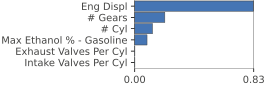

In [13]:
from rfpimp import *
features = list(X.columns)
I = importances(rm, X, y, features=features)
plot_importances(I, color='#4575b4')

#### Question (5 marks)

Explain the purpose of creating a baseline model. 

Ans:

The identification of data quality problems or faults in your data ,preprocessing workflow is another benefit of baseline models. If a basic baseline model performs poorly, it can be a sign that your data or the way you are processing it needs to be improved. Before creating more complicated models, this can help you in locating and fixing these problems.Furthermore, we can observe that the obb score is only 0.699, which is quite low. For this reason, we need to perform additional data analysis and feature development to improve model performance.

so thats why baseline model is most important for machine learning process.



### Part 2 - Convert non-numeric features to numeric

In this part you should: 
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features
 
#### Code (25 marks)

In [14]:
import category_encoders as ce
enc1 = ce.OneHotEncoder()
enc1.fit_transform(data[["Air Aspiration Method Desc"]])
new_arry = enc1.fit_transform(data[["Air Aspiration Method Desc"]])
new_arry

,Air Aspiration Method Desc_1,Air Aspiration Method Desc_2,Air Aspiration Method Desc_3,Air Aspiration Method Desc_4
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
1158,1,0,0,0
1159,1,0,0,0
1160,1,0,0,0
1161,1,0,0,0


In [15]:
encoder2 = ce.OrdinalEncoder(mapping=[{'col': 'Var Valve Lift?', 'mapping': {'N': 0, 'Y': 1}}])
new_arry2 = encoder2.fit_transform(data[["Var Valve Lift?"]])
new_arry2

,Var Valve Lift?
0,0
1,0
2,0
3,0
4,1
...,...
1158,0
1159,0
1160,0
1161,0


In [16]:
encoder3= ce.OrdinalEncoder(mapping=[{'col': 'Cyl Deact?', 'mapping': {'N': 0, 'Y': 1}}])
new_arry3 = encoder3.fit_transform(data[["Cyl Deact?"]])
new_arry3

,Cyl Deact?
0,1
1,0
2,0
3,0
4,0
...,...
1158,0
1159,0
1160,0
1161,0


In [17]:
encoder4 = ce.CountEncoder(cols = ['Trans Desc'])
new_arry4 = encoder4.fit_transform(data[["Trans Desc"]])
new_arry4

,Trans Desc
0,529
1,529
2,529
3,529
4,529
...,...
1158,529
1159,246
1160,246
1161,246


In [18]:
encoder5 = ce.CountEncoder(cols = ['Fuel Metering Sys Desc'])
new_arry5 = encoder5.fit_transform(data[["Fuel Metering Sys Desc"]])
new_arry5 

,Fuel Metering Sys Desc
0,251
1,251
2,251
3,251
4,834
...,...
1158,834
1159,251
1160,251
1161,251


# Now making fuction to covert all non-numeric vale to numeric value 

In [21]:
def Numeric_fuction():
        
        import category_encoders as ce
        non_number = [col for col in data.columns.tolist()]
        non_number
    
        X1 = data[non_number]
        Y1 = data['Comb Unadj FE - Conventional Fuel']
        encoder1 = ce.OneHotEncoder(cols = ['Air Aspiration Method Desc'])
        encoder1.fit(X1)
        X1 = encoder1.transform(X1)
        
        encoder2 = ce.OrdinalEncoder(mapping=[{'col': 'Var Valve Lift?', 'mapping': {'N': 0, 'Y': 1}}])
        encoder2.fit(X1)
        X1 = encoder2.transform(X1)
    
    
        encoder3 = ce.OrdinalEncoder(mapping=[{'col': 'Cyl Deact?', 'mapping': {'N': 0, 'Y': 1}}])
        encoder3.fit(X1)
        X1 = encoder3.transform(X1)
        
        
        encoder4 = ce.CountEncoder(cols = ['Trans Desc'])
        encoder4.fit(X1)
        X1 = encoder4.transform(X1)
        
        encoder5 = ce.CountEncoder(cols = ['Fuel Metering Sys Desc'])
        encoder5.fit(X1)
        X1 = encoder5.transform(X1)

      
    
        return X1

In [22]:
encoded_df = Numeric_fuction()
encoded_df.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc_1,Air Aspiration Method Desc_2,Air Aspiration Method Desc_3,Air Aspiration Method Desc_4,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,251,1,0,0,0,529,1,0
1,4.0,8,26.6603,8,10.0,2,2,251,1,0,0,0,529,0,0
2,6.0,12,20.4316,8,10.0,2,2,251,0,1,0,0,529,0,0
3,6.0,12,21.3382,8,10.0,2,2,251,0,1,0,0,529,0,0
4,1.5,3,36.7632,6,10.0,2,2,834,1,0,0,0,529,0,1


# In the this dataset, The terms Engine displacement and number of cylinder are 2 important measures of an engine and are interconnected which has greater impact on each other. Also, the transmission type contributes to a larger extent to a overall performance of a vehicle so thats why i took this three feture combine .

In [23]:
new_feature = encoded_df["Eng Displ"] ++ encoded_df["Trans Desc"] ++encoded_df["# Cyl"]
new_dataframe1 = pd.DataFrame(new_feature)
new_dataframe1

,0
0,546.2
1,541.0
2,547.0
3,547.0
4,533.5
...,...
1158,535.0
1159,257.8
1160,257.8
1161,257.8


In [24]:
final_data_frame = pd.concat([encoded_df,new_dataframe1],axis=1)
final_data_frame.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc_1,Air Aspiration Method Desc_2,Air Aspiration Method Desc_3,Air Aspiration Method Desc_4,Trans Desc,Cyl Deact?,Var Valve Lift?,0
0,5.2,12,22.8444,8,10.0,2,2,251,1,0,0,0,529,1,0,546.2
1,4.0,8,26.6603,8,10.0,2,2,251,1,0,0,0,529,0,0,541.0
2,6.0,12,20.4316,8,10.0,2,2,251,0,1,0,0,529,0,0,547.0
3,6.0,12,21.3382,8,10.0,2,2,251,0,1,0,0,529,0,0,547.0
4,1.5,3,36.7632,6,10.0,2,2,834,1,0,0,0,529,0,1,533.5


In [25]:
final_data_frame.columns = ['Eng Displ','# Cyl','Comb Unadj FE - Conventional Fuel','# Gears',
                            'Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl',
                            'Fuel Metering Sys Desc','Air Aspiration Method Desc_1',
                            'Air Aspiration Method Desc_2,','Air Aspiration Method Desc_3','Air Aspiration Method Desc_4',
                            'Trans Desc','Cyl Deact?','Var Valve Lift?','New_feature']
                             
                             
        

In [26]:
final_data_frame.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc_1,"Air Aspiration Method Desc_2,",Air Aspiration Method Desc_3,Air Aspiration Method Desc_4,Trans Desc,Cyl Deact?,Var Valve Lift?,New_feature
0,5.2,12,22.8444,8,10.0,2,2,251,1,0,0,0,529,1,0,546.2
1,4.0,8,26.6603,8,10.0,2,2,251,1,0,0,0,529,0,0,541.0
2,6.0,12,20.4316,8,10.0,2,2,251,0,1,0,0,529,0,0,547.0
3,6.0,12,21.3382,8,10.0,2,2,251,0,1,0,0,529,0,0,547.0
4,1.5,3,36.7632,6,10.0,2,2,834,1,0,0,0,529,0,1,533.5


In [27]:
num_features1 = ['Eng Displ','# Cyl','# Gears','Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl',
                'Fuel Metering Sys Desc','Air Aspiration Method Desc_1',
                'Air Aspiration Method Desc_2,','Air Aspiration Method Desc_3','Air Aspiration Method Desc_4',
                'Trans Desc','Cyl Deact?','Var Valve Lift?','New_feature']

#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.  

Ans: 
First, I chose one-hot encoding for the "Air Aspiration Method Desc" since it converts all numeric values to 0 and 1, which is highly useful for training our model and improves model performance.

Secondly, I chose an ordinal encoding for the variables "Valve Lift?" and "Cyl Deact?" since this method is primarily used to assign a numerical value to each category in a categorical variable depending on its position or rank. For example, I used y for 1 and n for 0.

thrildy,  I used the count encoder for the variables "Trans Desc" and "Fuel Metering Sys Desc" because of  there are too many categories in this dataset for one hot encoding, and the count encoder used for categorical variables replaces the value with the count of occurrences of that category in the dataset thats why i used this encoder .

encoder is more important because the majority of machine learning algorithms require numeric input data, the translation of non-numeric data to numeric data is an important stage in the process. These algorithms cannot directly operate on non-numerical data and it is useful to improve our model performance.




### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above 

#### Code (15 marks)

In [29]:
X_11 = final_data_frame[num_features1]
Y_11 = data['Comb Unadj FE - Conventional Fuel']
new1 = []
for i in range (10):
    rf = RandomForestRegressor(n_estimators=100, oob_score=True) 
    rf.fit(X_11, Y_11) 
    rf.oob_score_
    new1.append(rf.oob_score_)
print(f"oob score for randomstate  is {np.mean(rf.oob_score_)}")


oob score for randomstate  is 0.8652612468988727


### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference) 
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [30]:
print(f"oob score for randomstate  for baseline model is {np.mean(rm.oob_score_)}")

oob score for randomstate  for baseline model is 0.6992333971458813


In [31]:
print(f"oob score for randomstate for final model  is {np.mean(rf.oob_score_)}")

oob score for randomstate for final model  is 0.8652612468988727


In [32]:
a=np.mean(rm.oob_score_)
b=np.mean(rf.oob_score_)

In [33]:
percentdifference = ((b-a) / ((a + b) / 2))*100
print(percentdifference)

21.224470200006902


# percent difference for base line model and final model, our final more 21.22% more accuret and it is improved compare to base line model 

                               Importance
Feature                                  
Eng Displ                        0.895873
New_feature                      0.210378
# Cyl                            0.099008
Air Aspiration Method Desc_2,    0.079541
Max Ethanol % - Gasoline         0.074779
# Gears                          0.073002
Var Valve Lift?                  0.062856
Fuel Metering Sys Desc           0.044068
Air Aspiration Method Desc_1     0.026054
Trans Desc                       0.019712
Cyl Deact?                       0.004222
Air Aspiration Method Desc_3     0.001552
Intake Valves Per Cyl            0.000543
Air Aspiration Method Desc_4     0.000210
Exhaust Valves Per Cyl           0.000066


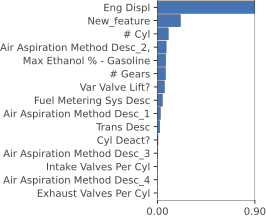

In [35]:
features = list(X_11.columns)
I = importances(rf, X_11, Y_11, features=features)
print(I)
plot_importances(I, color='#4575b4')

#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

Ans :
from my perspective,"Cyl Deact?","Air Aspiration Method Desc_3","Intake Valves Per Cyl","Exhaust Valves Per Cyl","Air Aspiration Method Desc_4" this features may be removed because of their impoertance is very very low for our model which is respectivly 0.001934,0.001779,0.000364,0.000165 and 0.000221.

Moreover, remove less importance feature can imporve our model performance as well as efficiency, well generalization , reduce overfitting problems.